In [1]:
!pip3 install texthero
!pip3 install wordcloud
!pip3 install contractions
!pip3 install -U spacy
!pip3 install -U nltk
!python -m spacy download en


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 39.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 KB 27.5 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26528059 sha256=72bff675791e59e33f0907290fec098e0ac71f8b55b02b771ed0e1a5acf926e7
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attemptin

In [2]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

print(locale.getpreferredencoding())


UTF-8
UTF-8


In [57]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np
import texthero as hero 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from collections import Counter
import contractions

nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
lemma = WordNetLemmatizer()

In [5]:
data = pd.read_csv('dataset.csv', encoding='ISO-8859-1')

In [6]:
data.shape

(23994, 14)

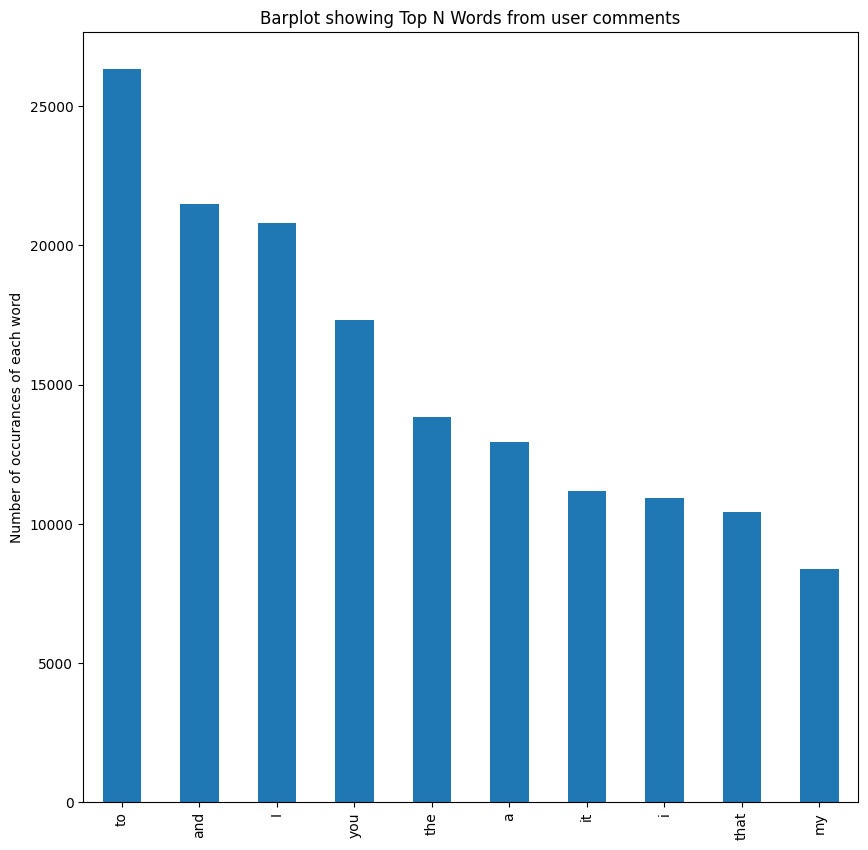

In [7]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

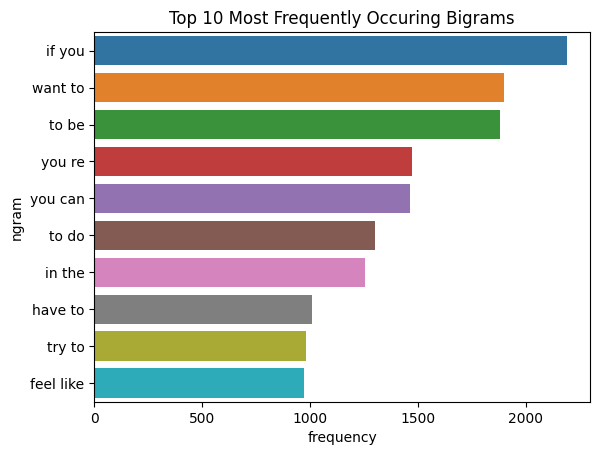

In [8]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [9]:
print(len(data.Content.unique()))
print(len(data))

23944
23994


In [10]:
print(len(data))

23994


In [11]:

def clean_text(text):
     # Remove anything that comes after "@"
    text = re.sub(r'@.*$#', '', text)
     # Keep only letters, numbers, and grammatical marks
    text = contractions.fix(text)
    text = re.sub(r'[^a-zA-Z0-9\s\.\?\!,]', '', text)
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

 # Apply the clean_text function to the "text" column of the dataset
data['Content'] = data['Content'].apply(clean_text)

 # Delete certain columns and the first row of data
columns_to_delete = ['ID', 'AuthorID', 'Author', 'Date', 'Words']
data = data.drop(columns=columns_to_delete)
# delete first row
data = data.iloc[1:]

for column in data.columns:
    if column != 'Content':
       data[column] = data[column].replace({'N': 0, 'Y': 1})
        
# Convert all non-"Contents" columns to integers
for column in data.columns:
     if column != 'Content':
         data[column] = pd.to_numeric(data[column], errors='coerce').astype('Int64')
        
# Save the cleaned dataset to a new CSV file
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data = data.rename(columns={'Change in appetite, losing or gaining weight': 'symptom_1'})
data = data.rename(columns={'Sleeping too much or not sleeping well (insomnia)': 'symptom_2'})
data = data.rename(columns={'Fatigue and low energy most days': 'symptom_3'})
data = data.rename(columns={'Feeling worthless, guilty, and hopeless': 'symptom_4'})
data = data.rename(columns={'An inability to focus and concentrate that may interfere with daily tasks at home, work, or school': 'symptom_5'})
data = data.rename(columns={'Movements that are unusually slow or agitated (a change which is often noticeable to others)': 'symptom_6'})
data = data.rename(columns={'Thinking about death and dying; suicidal ideation or suicide attempts': 'symptom_7'})


data.to_csv('./cleaned_dataset.csv', index=False)

In [12]:
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,"So, let get straight, father came knife want g...",0,0,0,0,0,0,0,1
1,"fighting, like bad ?",0,0,0,0,1,1,0,0
2,What in? If want say I going ask set I interes...,0,0,0,0,0,0,0,1
3,The one I dealing right ever technically toget...,0,0,0,0,0,0,0,1
4,2 week earlier I company meeting instead one h...,0,0,0,1,1,0,0,0


In [13]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


In [14]:
data.drop_duplicates(subset='Content',inplace=True)
data = data.dropna()
data = data.sample(frac=1).reset_index(drop=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Content    23911 non-null  object
 1   symptom_1  23911 non-null  Int64 
 2   symptom_2  23911 non-null  Int64 
 3   symptom_3  23911 non-null  Int64 
 4   symptom_4  23911 non-null  Int64 
 5   symptom_5  23911 non-null  Int64 
 6   symptom_6  23911 non-null  Int64 
 7   symptom_7  23911 non-null  Int64 
 8   None       23911 non-null  Int64 
dtypes: Int64(8), object(1)
memory usage: 1.8+ MB


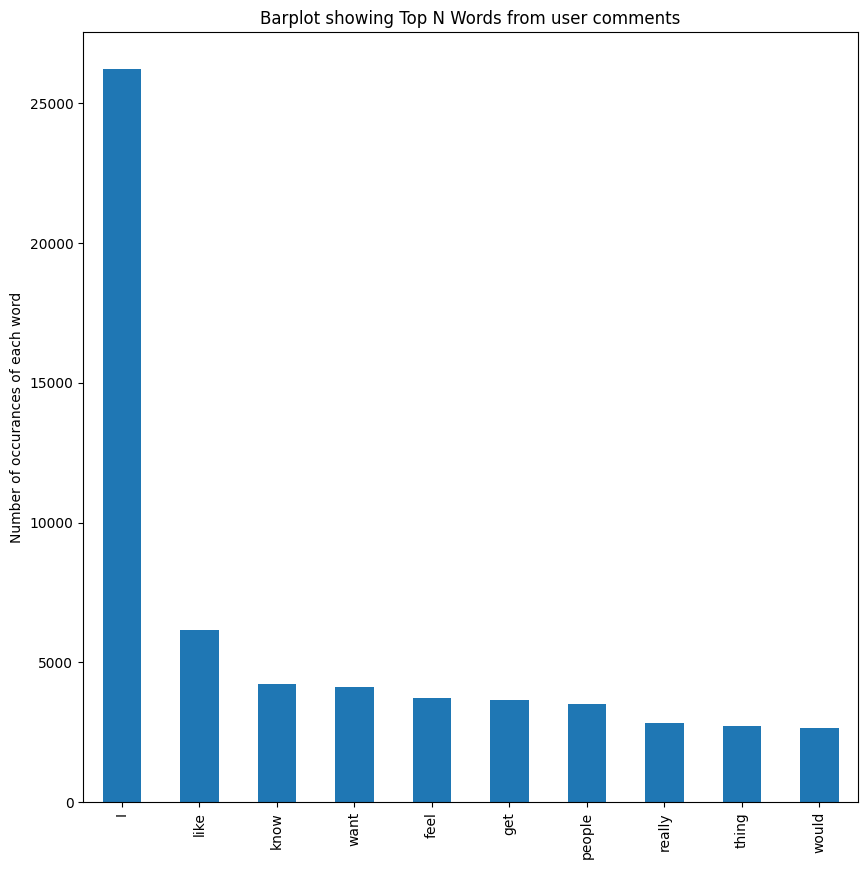

In [15]:
hero.top_words(data['Content']).head(10).plot.bar(figsize=(10,10))
plt.title('Barplot showing Top N Words from user comments')
plt.ylabel('Number of occurances of each word')
plt.show()

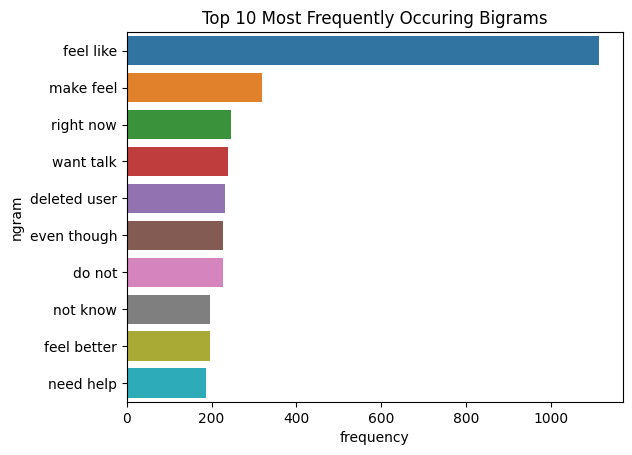

In [16]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Content'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

Text(0, 0.5, 'Frequency of Text Length')

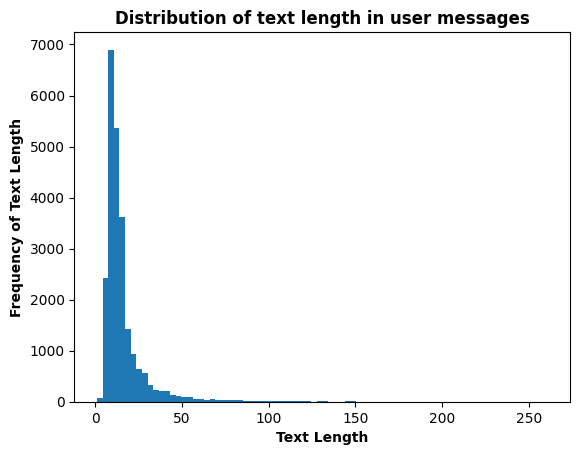

In [17]:
data["Words"] = data["Content"].apply(lambda n: len(n.split()))
data['Words'].plot.hist(bins=80)

plt.title('Distribution of text length in user messages', fontweight='bold')
plt.xlabel("Text Length", fontweight='bold')
plt.ylabel("Frequency of Text Length", fontweight='bold')

Text(0.5, 1.0, 'Wordcloud showing top N words')

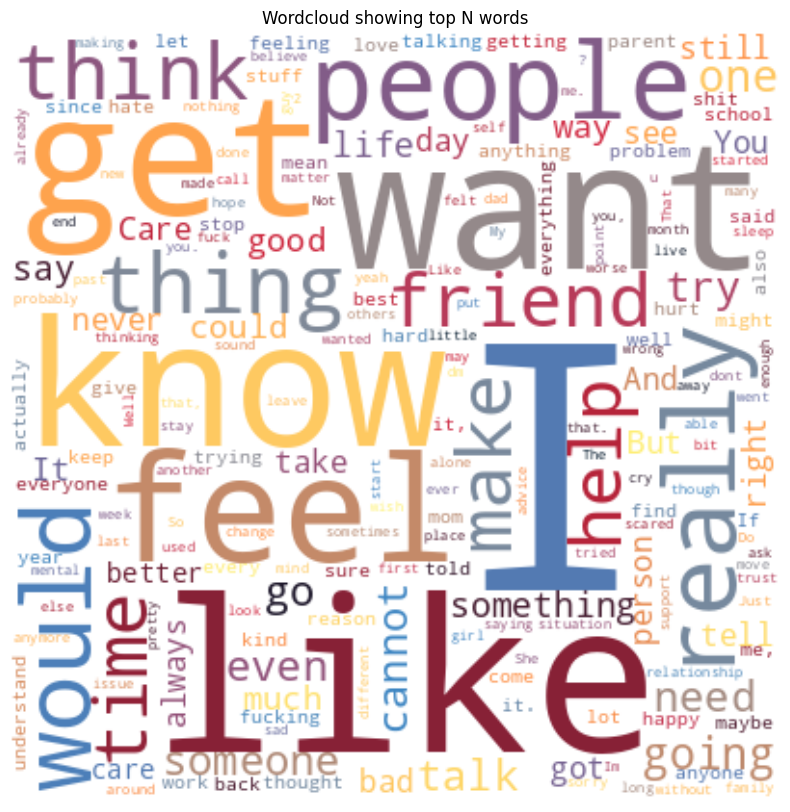

In [18]:
hero.visualization.wordcloud(data['Content'],width = 400, height= 400,background_color='White')
plt.title('Wordcloud showing top N words')

In [19]:
data = data.drop(columns='Words')
data.head()

,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None
0,wow actually take well. basically teach way co...,0,0,0,0,0,0,0,1
1,"got mine morning, understand may like it, know...",0,0,0,0,0,0,0,1
2,yeah right obligated neither obligated tell so...,0,0,0,0,0,0,0,1
3,Why I sad I post depression sub Reddit advice ...,0,0,0,0,0,0,0,1
4,"feel like share, feel free dm me! I would love...",0,0,0,0,0,0,0,1


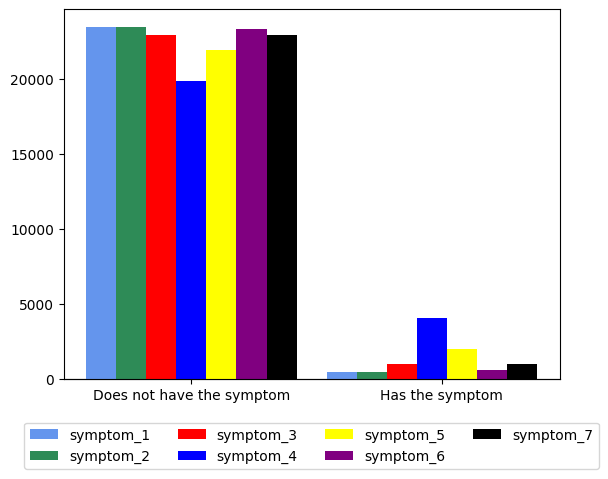

In [20]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0]) / 8.0

ax.bar(d_bins[:-1] + width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1] + width * 2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1] + width * 3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1] + width * 4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1] + width * 5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1] + width * 6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1] + width * 7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0] + width * 4, ss_bins[-1] - width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [21]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 28.7 MB/s eta 0:00:00


**Synonyms**

In [22]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

In [24]:
aug = naw.SynonymAug(aug_src='wordnet', model_path=None, name='Synonym_Aug', aug_min=3, aug_p=0.2, lang='eng', 
                     stopwords=None, tokenizer=None, reverse_tokenizer=None, stopwords_regex=None, force_reload=False, 
                     verbose=0)
 
test_sentence_aug = aug.augment(tx)
print(tx)
print(test_sentence_aug[0])

I am feeling sad. My belly hurts so bad and I want to die
I make up sense sad. My belly hurts so defective and I want to die


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [25]:
!pip install --upgrade transformers
!pip uninstall transformers sentencepiece
!pip install transformers sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 93.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 99.0 MB/s eta 0:00:00
Found existing installation: transformers 4.27.4
Uninstalling transformers-4.27.4:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.9/dist-packages/transformers-4.27.4.dist-info/*
    /usr/local/lib/python3.9/dist-packages/transformers/*
Proceed (Y/n)? y
  Successfully uninstalled transformers-4.27.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.9 MB/s eta 0:00:00


In [27]:
from transformers import MarianTokenizer, MarianMTModel

def back_translate(text, translation_model_name, back_translation_model_name):
    # Tokenizers
    translation_tokenizer = MarianTokenizer.from_pretrained(translation_model_name)
    back_translation_tokenizer = MarianTokenizer.from_pretrained(back_translation_model_name)

    # Models
    translation_model = MarianMTModel.from_pretrained(translation_model_name)
    back_translation_model = MarianMTModel.from_pretrained(back_translation_model_name)

    # Translate text to intermediate language
    translation_inputs = translation_tokenizer.encode(text, return_tensors="pt")
    translated_outputs = translation_model.generate(translation_inputs)
    translated_text = translation_tokenizer.decode(translated_outputs[0])

    # Translate translated_text back to the original language
    back_translation_inputs = back_translation_tokenizer.encode(translated_text, return_tensors="pt")
    back_translated_outputs = back_translation_model.generate(back_translation_inputs)
    back_translated_text = back_translation_tokenizer.decode(back_translated_outputs[0])

    return back_translated_text

# Example usage
# translation_model_name = "Helsinki-NLP/opus-mt-en-fr"
# back_translation_model_name = "Helsinki-NLP/opus-mt-fr-en"

translation_model_name = "Helsinki-NLP/opus-mt-en-zh"
back_translation_model_name = "Helsinki-NLP/opus-mt-zh-en"
text = "I am feeling quite sad and exhausted."
back_translated_text = back_translate(text, translation_model_name, back_translation_model_name)
print(back_translated_text)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (512) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


<pad> I'm very sad and tired.</s>


In [41]:
data = pd.read_csv('cleaned_dataset.csv', encoding='ISO-8859-1')

In [42]:
data.shape

(23911, 9)

In [44]:
data['powerlabel'] = data.apply(lambda x : 6.4 * x['symptom_1'] + 3.2 * x['symptom_2'] + 1.6*x["symptom_3"] + 0.8 * x['symptom_4'] + 0.4 * x['symptom_5'] + 0.2 * x['symptom_6'] + 0.1 * x['symptom_7'],axis=1)
data.head()


,Content,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,None,powerlabel
0,"So, let get straight, father came knife want g...",0,0,0,0,0,0,0,1,0.0
1,"fighting, like bad ?",0,0,0,0,1,1,0,0,0.6
2,What in? If want say I going ask set I interes...,0,0,0,0,0,0,0,1,0.0
3,The one I dealing right ever technically toget...,0,0,0,0,0,0,0,1,0.0
4,2 week earlier I company meeting instead one h...,0,0,0,1,1,0,0,0,1.2


In [45]:
data.shape

(23911, 10)

In [46]:
powercount = {}
powerlabels = np.unique(data['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(data['powerlabel'] == p)

th = 20
maxcount = int(np.mean(list(powercount.values())))
data_df = pd.DataFrame()
new_data = pd.DataFrame()
x = 0
cols = ['Content', 'symptom_1','symptom_2','symptom_3','symptom_4','symptom_5','symptom_6','symptom_7', 'None','powerlabel']

for p in powerlabels:
    gapnum = maxcount - powercount[p]
    if(gapnum > 0):
        temp_df = data.iloc[np.random.choice(np.where(data['powerlabel']==p)[0],size=gapnum)]
        td = temp_df.copy()
        temp_df = temp_df.reset_index(drop=True)
        x = []
        for i in temp_df['Content']:
            x.append(aug.augment(i)[0])
        temp_df = temp_df.assign(new_cont=x)
    
        temp_df.drop('Content', axis=1, inplace = True)
        temp_df.insert(0, 'Content', temp_df.pop('new_cont'))
        print(temp_df['Content'].head())
        print('\n'*5)
        data_df = pd.concat([data_df, temp_df])

data_df = pd.concat([data, data_df])
data = data_df.sample(frac=1).reset_index(drop=True)
data.to_csv('./data_balanced.csv', index=False)



0    worries, dm undecided, telephone set dying mig...
1    Deleted User talk at once, try make understand...
2    look 45 tried jump bridge last night someone h...
3    Listen guy mama like 3 month straight fact ind...
4    Tutelage Today going slowly Unity want end. I ...
Name: Content, dtype: object






0    home write stay mom summer sprightliness decid...
1    Concern need help. emergency. think ruined sou...
2    I one great breakdown school day I thinking ki...
3    everyone enjoin pinnacle life, college high sc...
4    So huge difference fucking around broke arm co...
Name: Content, dtype: object






0    Do tell need help look someone enunciate soemt...
1    yeha unobjectionable kinesthetic motion necess...
2    well try really want break her, hateful world ...
3    A couple hour ago around 3 maybe I got store s...
4    Do say postulate help wait someone tell soemthjng
Name: Content, dtype: object






0    Still fucking worried. I hate mind work like t...
1    When I 2 I

In [47]:
data.shape

(44277, 10)

In [48]:
len(data.Content.unique())

44085

In [49]:
data.shape

(44277, 10)

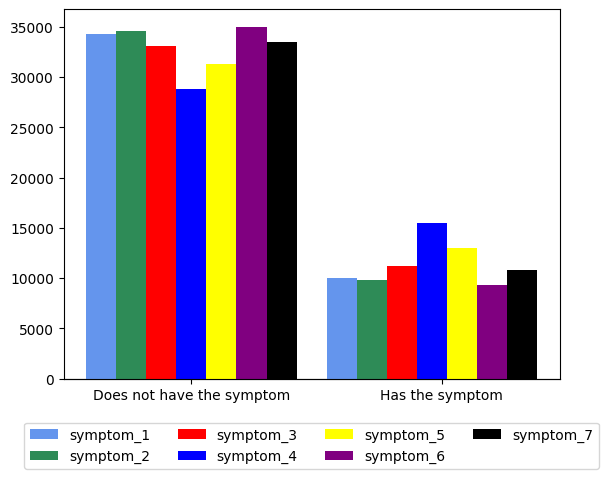

In [50]:
ig, ax = plt.subplots()

d_heights, d_bins = np.histogram(data['symptom_1'],bins=[-0.5, 1, 2])
m_heights, m_bins = np.histogram(data['symptom_2'], bins=d_bins)
s_heights, s_bins = np.histogram(data['symptom_3'], bins=m_bins)
ss_heights, ss_bins = np.histogram(data['symptom_4'], bins=s_bins)
t_heights, t_bins = np.histogram(data['symptom_5'], bins=ss_bins)
te_heights, te_bins = np.histogram(data['symptom_6'], bins=t_bins)
tr_heights, tr_bins = np.histogram(data['symptom_7'], bins=te_bins)


width = (d_bins[1] - d_bins[0])/8.0

ax.bar(d_bins[:-1]+width, d_heights, width=width, facecolor='cornflowerblue', label='symptom_1')
ax.bar(m_bins[:-1]+width*2, m_heights, width=width, facecolor='seagreen', label='symptom_2')
ax.bar(s_bins[:-1]+width*3, s_heights, width=width, facecolor='red', label='symptom_3')
ax.bar(ss_bins[:-1]+width*4, ss_heights, width=width, facecolor='blue', label='symptom_4')
ax.bar(t_bins[:-1]+width*5, t_heights, width=width, facecolor='yellow', label='symptom_5')
ax.bar(te_bins[:-1]+width*6, te_heights, width=width, facecolor='purple', label='symptom_6')
ax.bar(tr_bins[:-1]+width*7, tr_heights, width=width, facecolor='black', label='symptom_7')


secax = ax.secondary_xaxis('bottom')
secax.set_xticks([d_bins[0]+width*4, ss_bins[-1]-width])
secax.set_xticklabels(['Does not have the symptom', 'Has the symptom'])
ax.get_xaxis().set_visible(False)
ax.legend()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

In [51]:
!pip3 install transformers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification, BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# Load the dataset
df = pd.read_csv("./data_balanced.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert labels to tensor
labels = tf.convert_to_tensor(df[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7', 'None']].values)

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Compile the model for training
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Tokenize input sentences and create attention masks
input_ids = []
attention_masks = []

for sentence in df['Content']:
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=387, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='tf')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert input_ids and attention_masks to tensors
input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Split the data into training and testing sets
input_ids_arr = np.asarray(input_ids)
attention_masks_arr = np.asarray(attention_masks)
labels_arr = np.asarray(labels)
train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, train_labels, test_labels = train_test_split(input_ids_arr, attention_masks_arr, labels_arr, test_size=0.2, random_state=42)

# Train the model or load saved weights
checkpoint_file = 'model_weights.h5'
if tf.io.gfile.exists(checkpoint_file):
    # Load saved weights if the checkpoint file exists
    model.load_weights(checkpoint_file)
else:
    # Train the model and save the weights
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

    history = model.fit([train_input_ids, train_attention_masks], train_labels, epochs=1, batch_size=16, validation_data=([test_input_ids, test_attention_masks], test_labels), callbacks=[early_stopping, checkpoint])
    model.save_weights(checkpoint_file)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2214/2214 [==============================] - 3343s 1s/step - loss: 0.2729 - accuracy: 0.8886 - val_loss: 0.1594 - val_accuracy: 0.9440


In [53]:
test_loss, test_acc = model.evaluate([test_input_ids, test_attention_masks], test_labels, verbose=2)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

277/277 - 271s - loss: 0.1594 - accuracy: 0.9440 - 271s/epoch - 977ms/step
Test Loss: 0.15941137075424194
Test Accuracy: 0.9439645409584045


In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Make predictions
predictions = model.predict([test_input_ids, test_attention_masks])
# Convert logits to probabilities
probabilities = tf.nn.sigmoid(predictions.logits)
# Convert probabilities to binary values using a threshold of 0.5
binary_predictions = tf.where (probabilities < 0.5, 0, 1)
# Calculate F1 score, recall, and precision
f1 = f1_score (test_labels, binary_predictions, average= 'weighted')
recall = recall_score(test_labels, binary_predictions, average= 'weighted' )
precision = precision_score(test_labels, binary_predictions, average= 'weighted' )
# Print the results
print ('FI Score:', f1) 
print('Recall:', recall) 
print ('Precision:', precision)

277/277 [==============================] - 272s 972ms/step
FI Score: 0.9004115907655601


NameError: ignored

In [55]:
f1 = f1_score (test_labels, binary_predictions, average= 'weighted')
recall = recall_score(test_labels, binary_predictions, average= 'weighted' )
precision = precision_score(test_labels, binary_predictions, average= 'weighted' )
# Print the results
print ('FI Score:', f1) 
print('Recall:', recall) 
print ('Precision:', precision)

FI Score: 0.9004115907655601
Recall: 0.8781603288797534
Precision: 0.9267569887548815


In [58]:
!pip3 install transformers
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import TFRobertaForSequenceClassification, RobertaTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the dataset
df = pd.read_csv("./data_balanced.csv")

# Drop rows with missing values
df.dropna(inplace=True)

# Convert labels to tensor
labels = tf.convert_to_tensor(df[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5', 'symptom_6', 'symptom_7', 'None']].values)

# Initialize tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', do_lower_case=True)
model = TFRobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=labels.shape[1])

# Compile the model for training
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Tokenize input sentences and create attention masks
input_ids = []
attention_masks = []

for sentence in df['Content']:
    encoded_dict = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=387, padding='max_length', truncation=True, return_attention_mask=True, return_tensors='tf')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert input_ids and attention_masks to tensors
input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

# Split the data into training and testing sets
input_ids_arr = np.asarray(input_ids)
attention_masks_arr = np.asarray(attention_masks)
labels_arr = np.asarray(labels)
train_input_ids, test_input_ids, train_attention_masks, test_attention_masks, train_labels, test_labels = train_test_split(input_ids_arr, attention_masks_arr, labels_arr, test_size=0.2, random_state=42)

# Train the model or load saved weights
checkpoint_file = 'roberta_model_weights.h5'
if tf.io.gfile.exists(checkpoint_file):
    # Load saved weights if the checkpoint file exists
    model.load_weights(checkpoint_file)
else:
    # Train the model and save the weights
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    checkpoint = tf.keras.callbacks.ModelCheckpoint('roberta_model_weights.h5', monitor='val_loss', save_best_only=True, save_weights_only=True)

    history = model.fit([train_input_ids, train_attention_masks], train_labels, epochs=2, batch_size=16, validation_data=([test_input_ids, test_attention_masks], test_labels), callbacks=[early_stopping, checkpoint])
    model.save_weights(checkpoint_file)


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
2214/2214 [==============================] - 3298s 1s/step - loss: 0.2791 - accuracy: 0.8854 - val_loss: 0.1826 - val_accuracy: 0.9306
Epoch 2/2
1054/2214 [=============>................] - ETA: 25:53 - loss: 0.1574 - accuracy: 0.9437

In [ ]:
# test_loss, test_acc = model.evaluate([test_input_ids, test_attention_masks], test_labels, verbose=2)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_acc)